In [85]:
from datetime import date

today = date.today()
filecount = 1

In [86]:
import numpy as np
from time import time
from numba import jit
#from timeit import default_timer as timer

count = 100000  # <---- Change this !

a = np.arange(start=3, stop=count, step=1, dtype = np.int64)

#@jit(nopython=True)
@jit
def findprimes(inp):
    np_beg = np.array([1, 2])
    for j in inp:
        isprime = False
        for i in range(2, j):
            if (j % i) == 0:
                isprime = True
                break
        if not isprime:
            np_end = np.array([j])
            np_return = np.append(np_beg, np_end)
            np_beg = np_return
    return np_return

start = time()
#%timeit primes = findprimes(a)
primes = findprimes(a)
end = time()

print(f"Calc time: {end - start :.2f} sec")
print(f"I found  : {len(primes)} number")
print(primes[:5], primes[-5:])

Calc time: 2.47 sec
I found  : 9593 number
[1 2 3 5 7] [99929 99961 99971 99989 99991]


---
### Print prime numbers to a file
```sh
$ > data_{today}_{count}_{filecount}.txt
```
---

In [87]:
filename = "data" + "_" + str(today) + "_" + str(count)+ "_" + str(filecount) + ".txt"
calctime = end - start
from tqdm import tqdm
with open("%s" %filename, 'w+') as output:
    output.write("Calc until: %s\n" % count)
    output.write("Calc time : {:.3f}\n".format(calctime))
    for i in primes:
        output.write("%s\n" % i)
output.close()
filecount += 1
print(f"\nThe file was successfully written as '{filename}'")


The file was successfully written as 'data_2021-10-03_100000_1.txt'


Calc time of 9593 number: 8.32 sec


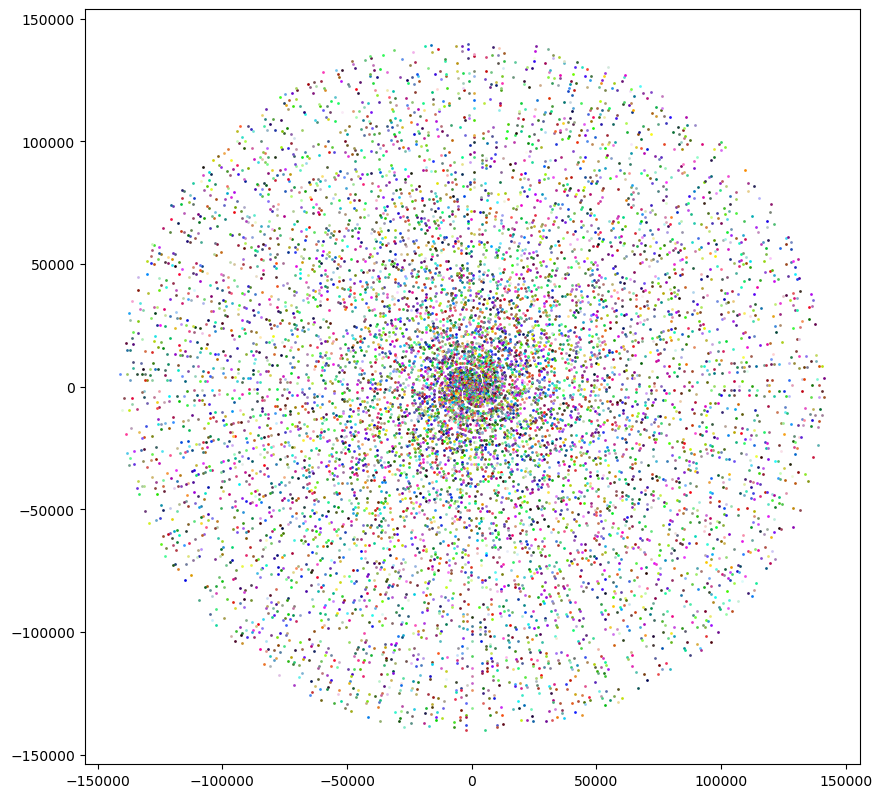

In [88]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import figure
from time import time
figure(figsize=(10, 10), dpi=100)

###############################################################################
# Source: Mark Dickinson
# https://stackoverflow.com/questions/34372480/rotate-point-about-another-point-in-degrees-python/34374437
###############################################################################
#@jit(nopython=True)
@jit
def rotate(point, ang):
    px = point
    angle = ang
    mathcos = math.cos(angle) * (px)
    mathsin = math.sin(angle) * (px)
    qx = mathcos - mathsin
    qy = mathsin + mathcos
#     qx = math.cos(angle) * (px) - math.sin(angle) * (px)
#     qy = math.sin(angle) * (px) + math.cos(angle) * (px)
    return qx, qy
###############################################################################


start = time()
for x, nums in enumerate(primes):
    qx, qy = rotate(primes[x], primes[x])
#     plt.scatter(qx, qy, s = 1, alpha=0.8)
    r, g, b = np.random.uniform(0, 1, 3)
    plt.plot(qx, qy, 'o', markerfacecolor='none', markeredgecolor=(r, g, b, 1), markersize = 1, alpha=1)

end = time()
print(f"Calc time of {len(primes)} number: {end - start :.2f} sec")
# -----------------------
# with pltscatter()
# count = 50000
# with @jit : 45.14 sec
# -----------------------
# with plt.plot()
# count = 50000
# with @jit : 4.04 sec
# -----------------------
plt.show()
